In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import numpy as np
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.shape

(891, 12)

In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [6]:
X.head()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,22.0,male,1,0,7.2500,S
1,1,38.0,female,1,0,71.2833,C
2,3,26.0,female,0,0,7.9250,S
3,1,35.0,female,1,0,53.1000,S
4,3,35.0,male,0,0,8.0500,S


In [7]:
y = data[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [8]:
X.isnull().sum()

Pclass        0
Age         177
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
X[['Embarked']].mode()

,Embarked
0,S


In [9]:
X['Age'].fillna(X['Age'].median(skipna=True), inplace=True)
X['Embarked'].fillna(X['Embarked'].value_counts().idxmax(), inplace=True)

In [10]:
X.columns

Index(['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [12]:
encoder = ce.OrdinalEncoder(cols=['Sex', 'Embarked'])

In [13]:
X = encoder.fit_transform(X)

In [14]:
X

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
0,3,22.0,1,1,0,7.2500,1
1,1,38.0,2,1,0,71.2833,2
2,3,26.0,2,0,0,7.9250,1
3,1,35.0,2,1,0,53.1000,1
4,3,35.0,1,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,27.0,1,0,0,13.0000,1
887,1,19.0,2,0,0,30.0000,1
888,3,28.0,2,1,2,23.4500,1
889,1,26.0,1,0,0,30.0000,2


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=8)

In [25]:
X_train.shape, y_test.shape

((712, 7), (179, 1))

In [33]:
param_grid = {
    'max_depth': [3, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.00, 0.01, 0.15]
}
tree1 = DecisionTreeClassifier()
grid_search = GridSearchCV(tree1, param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print(f"best parameters: {best_params}")
print(f"best score: {best_score}")

best parameters: {'ccp_alpha': 0.0, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 6}
best score: 0.8285602503912364


In [34]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=6)

In [35]:
accuracy_score(y_test, best_model.predict(X_test))

0.8100558659217877

In [36]:
f1_score(y_test, best_model.predict(X_test))

0.7384615384615385

In [37]:
print(confusion_matrix(y_test, best_model.predict(X_test)))

[[97 11]
 [23 48]]


In [38]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       108
           1       0.81      0.68      0.74        71

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



[Text(0.47214673913043476, 0.9375, 'x[2] <= 1.5\ngini = 0.471\nsamples = 712\nvalue = [441, 271]'),
 Text(0.22010869565217392, 0.8125, 'x[0] <= 1.5\ngini = 0.29\nsamples = 460\nvalue = [379, 81]'),
 Text(0.10869565217391304, 0.6875, 'x[1] <= 53.0\ngini = 0.463\nsamples = 99\nvalue = [63, 36]'),
 Text(0.06521739130434782, 0.5625, 'x[5] <= 26.106\ngini = 0.491\nsamples = 81\nvalue = [46, 35]'),
 Text(0.043478260869565216, 0.4375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.08695652173913043, 0.4375, 'x[5] <= 27.135\ngini = 0.499\nsamples = 74\nvalue = [39, 35]'),
 Text(0.043478260869565216, 0.3125, 'x[1] <= 40.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.021739130434782608, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.06521739130434782, 0.1875, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.13043478260869565, 0.3125, 'x[1] <= 17.5\ngini = 0.482\nsamples = 64\nvalue = [38, 26]'),
 Text(0.10869565217391304, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = 

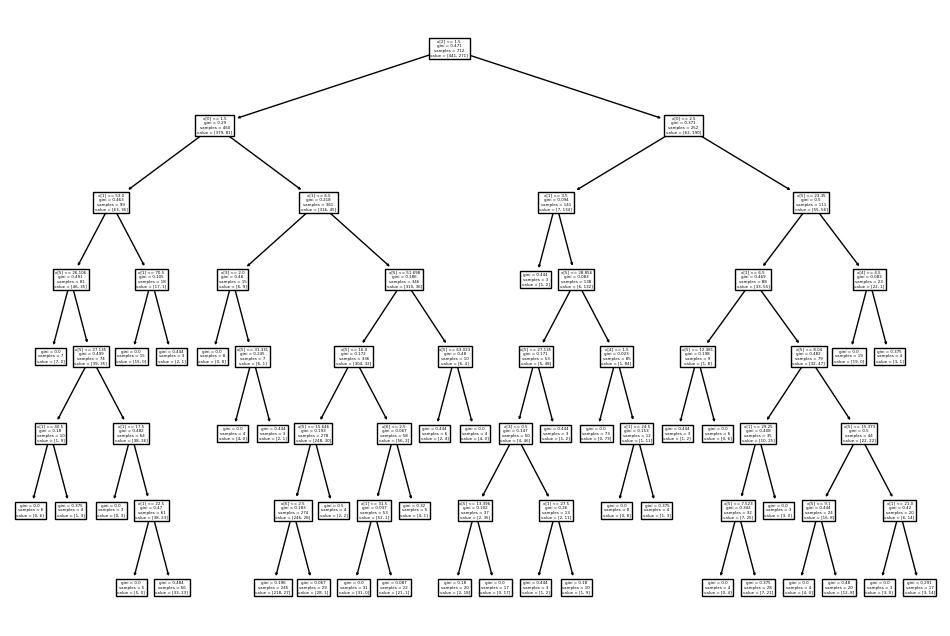

In [39]:
plt.figure(figsize=(12,8))
tree.plot_tree(best_model.fit(X_train, y_train))